In [8]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

import dtale

import logging

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set3") 

#sns.color_palette("Set3").as_hex()


# Проектирование экспериментов и построение пайплайна

Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

Каждая история болезни характеризуется следующими признаками:

- No_show — пациент не пришёл на приём;
- Gender — пол пациента;
- ScheduledDay — день, когда планируется встреча;
- AppointmentDay — реальная дата встречи;
- Age — возраст пациента;
- Neighbourhood — район проживания каждого пациента;
- Scholarship — получает ли пациент стипендию;
- …и несколько других признаков.

1. Первым этапом данных является загрузка [данных]([text](https://www.kaggle.com/joniarroba/noshowappointments)): 

In [3]:
df = pd.read_csv('./data/KaggleV2-May-2016.csv.zip')

Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
Кто не появляется чаще — мужчины или женщины?

2. Для ответа на эти и другие подобные вопросы используется EDA.

Найти соотношение людей, которые пропускают приёмы, к тем, кто этого не делает, можно с помощью гистограммы:

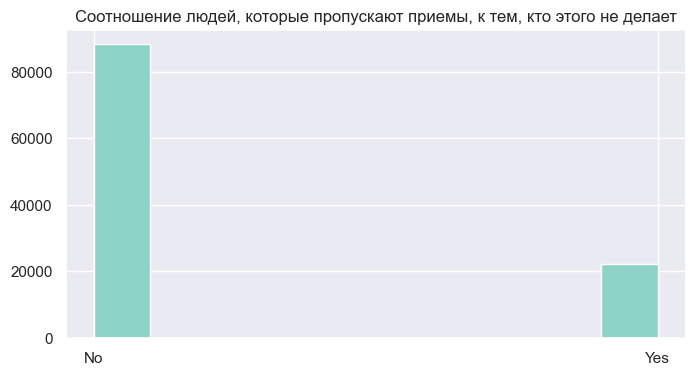

In [4]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

Или, если мы хотим получить точную пропорцию, — с помощью метода value_counts():

In [5]:
df['No-show'].value_counts(True)

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [6]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

Gender
F    0.653882
M    0.346118
Name: proportion, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.

3. После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. 

Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. 

Для one-hot кодировки можно воспользоваться методом get_dummies() библиотеки pandas:

In [7]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

4. После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели. 

Об этом вы узнаете в будущих модулях!  


Предположим, вы несколько раз обучили модель с разными параметрами, подобрали наилучшие и достигли accuracy>0.9. То есть доля верных предсказаний превышает 90 %. Также вы узнали, что наибольший вклад в модель вносят такие признаки, как пол, регион и факт наличия стипендии. Про влияние пола на результат вы догадались во время проведения EDA, регион кажется тоже понятным фактором: люди в крупных городах больше склонны приходить на последующий назначенный прием, а вот факт наличия стипендии — не такой очевидный фактор. 

Это подтверждает тезис о том, что модели машинного обучения могут рассматриваться как чёрный ящик: нечто, куда мы кладём свои данные и получаем предсказание. Не всегда результаты прогнозов легко интерпретируемы. Обычно существует трэйд-офф между качеством модели и её интерпретируемостью: чем сложнее модель, тем выше, но менее очевиден её результат.    